In [6]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import RobustScaler
import joblib

In [7]:
# Load the trained model
model = tf.keras.models.load_model(
    'lstm_model64_V3.keras'
)

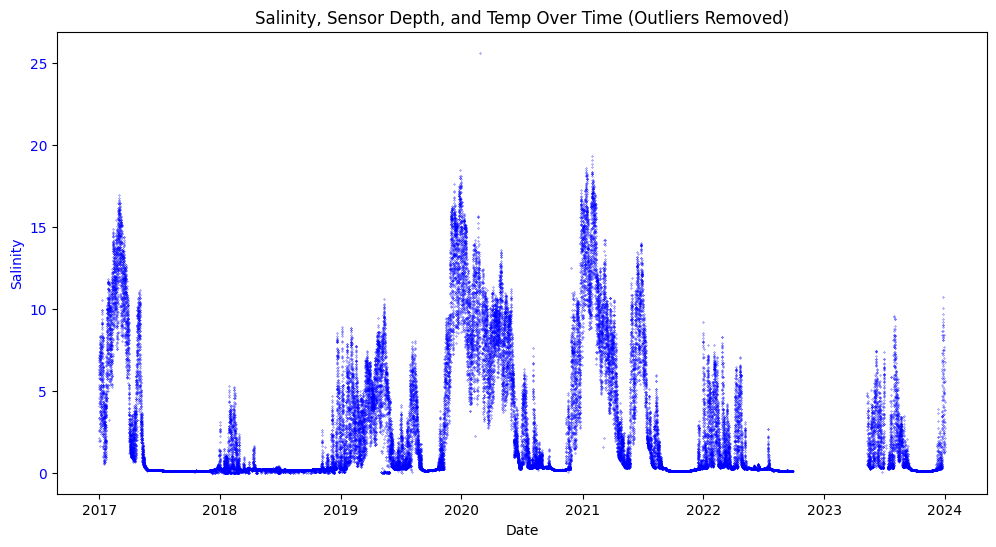

In [8]:
# Load the data
csv_file = '/Users/ratchanonkhongsawi/Desktop/CMKL/2nd/FALL/RND1/Data/ladpo_hourlyw.csv'
df = pd.read_csv(csv_file)

# Convert date_time to datetime format and set as the index
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')
df.set_index('date_time', inplace=True)

# Filter for columns 'Salinity' and 'Sensor_Depth' and remove rows with NaN values
df = df.loc[: , ['Salinity']].dropna()

# Remove outliers in Sensor_Depth (e.g., values above 55, assuming they're erroneous)
df = df[(df['Salinity'] > 0) & (df['Salinity'] < 55)]

# Plot both columns
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Salinity data
ax1.plot(df.index, df['Salinity'], '.', markersize=0.5, label='Salinity', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Salinity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Title and show plot
plt.title('Salinity, Sensor Depth, and Temp Over Time (Outliers Removed)')
plt.show()

In [9]:
# df = df.loc['2019-01-01':, ['Salinity']]
print('df min max:', df['Salinity'].min(), df['Salinity'].max())

df min max: 0.001666667 25.633333333333336


In [11]:
# Load the saved scalers
preprocessing = joblib.load('lstm64_preprocessing_params.pkl')
preprocessing

{'scaler': RobustScaler()}

In [10]:
# Load the saved scalers
preprocessing = joblib.load('lstm64_preprocessing_params.pkl')


# Assuming 'new_data' is your new DataFrame with the 'Salinity' column
# Step 1: Apply Robust Scaling
scaled_data = robust_scaler.transform(df)

# Step 2: Apply Min-Max Scaling
normalized_data = minmax_scaler.transform(scaled_data)

# Convert to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=['Salinity'])

# Display the first few rows of the normalized data
print(normalized_df.head())

NameError: name 'robust_scaler' is not defined

In [ ]:
# Make predictions
predictions = model.predict(normalized_df)

# Assuming 'df' has the true values in a column called 'Salinity'
true_values = df['Salinity'].values

1443/1443 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step


In [ ]:
# Assuming `predictions`, `true_values`, and any other data are in their scaled form
# Step 1: Inverse Min-Max Scaling
denormalized_predictions = minmax_scaler.inverse_transform(predictions.reshape(-1, 1))

# # Step 2: Inverse Robust Scaling
denormalized_predictions = robust_scaler.inverse_transform(denormalized_predictions)

# Convert to 1D arrays if needed
denormalized_predictions = denormalized_predictions.flatten()

# Display the first few values for verification
print("Denormalized Predictions (first 10):", denormalized_predictions[:10])
print("True Values (first 10):", true_values[:10])

Denormalized Predictions (first 10): [5.1299276 4.9029126 4.806096  4.6672845 4.6617985 4.567878  4.4355526
 4.1681123 4.141365  3.8340714]
True Values (first 10): [5.01333333 4.7925     4.69833333 4.56333333 4.558      4.46666667
 4.338      4.078      4.052      3.75333333]


In [ ]:
# Import the MeanAbsoluteError class
mae_metric = tf.keras.losses.MeanAbsoluteError()

# Calculate MAE
mae = mae_metric(true_values, denormalized_predictions).numpy()
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.2356


In [ ]:
print("Predictions range:", predictions.min(), predictions.max())
print("True values range:", true_values.min(), true_values.max())

Predictions range: -0.0006876204 1.5770667
True values range: 0.0016666666666666 78.86500000000001


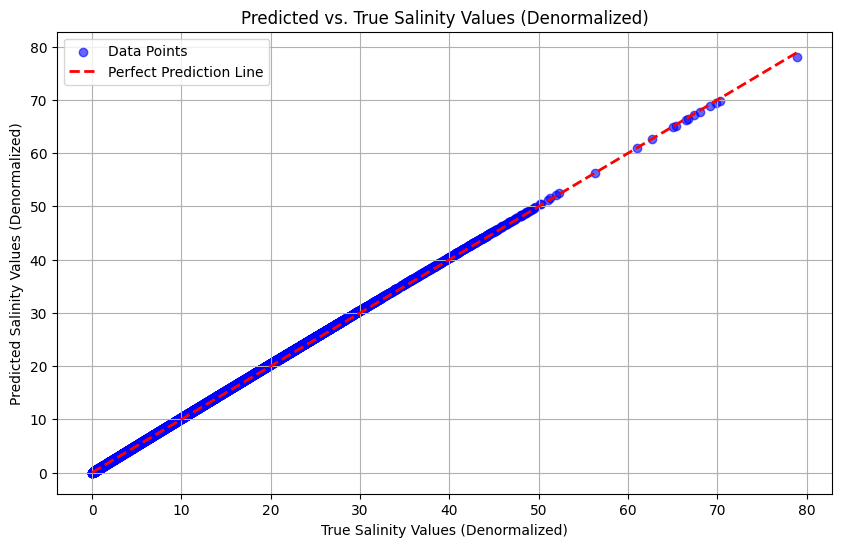

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(true_values, denormalized_predictions, alpha=0.6, color='blue', label='Data Points')
plt.plot([true_values.min(), true_values.max()],
         [true_values.min(), true_values.max()], 'r--', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('True Salinity Values (Denormalized)')
plt.ylabel('Predicted Salinity Values (Denormalized)')
plt.title('Predicted vs. True Salinity Values (Denormalized)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Min of denormalized predictions:", denormalized_predictions.min())
print("Max of denormalized predictions:", denormalized_predictions.max())
print("Min of  true values:", true_values.min())
print("Max of  true values:", true_values.max())

Min of denormalized predictions: -0.03239567
Max of denormalized predictions: 78.12429
Min of  true values: 0.0016666666666666
Max of  true values: 78.86500000000001


In [ ]:
print("Shape of denormalized_predictions:", denormalized_predictions.shape)
print("Shape of denormalized_true_values:", true_values.shape)

Shape of denormalized_predictions: (46167,)
Shape of denormalized_true_values: (46167,)


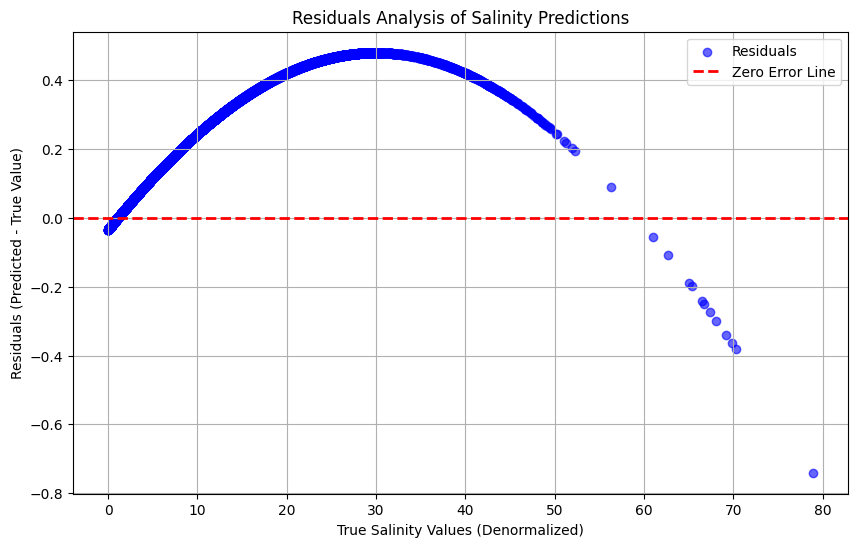

In [ ]:
# Calculate residuals (errors)
residuals = denormalized_predictions - true_values

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(true_values, residuals, alpha=0.6, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')
plt.xlabel('True Salinity Values (Denormalized)')
plt.ylabel('Residuals (Predicted - True Value)')
plt.title('Residuals Analysis of Salinity Predictions')
plt.legend()
plt.grid(True)
plt.show()

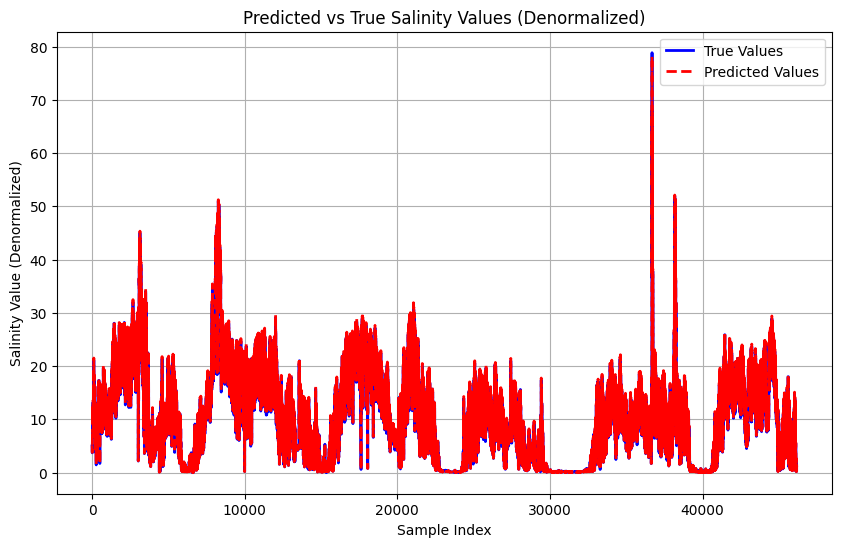

In [ ]:
# Plot Predicted vs True Salinity Values
plt.figure(figsize=(10, 6))
plt.plot(true_values, label='True Values', color='blue', linewidth=2)
plt.plot(denormalized_predictions, label='Predicted Values', color='red', linestyle='--', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('Salinity Value (Denormalized)')
plt.title('Predicted vs True Salinity Values (Denormalized)')
plt.legend()
plt.grid(True)
plt.show()